In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 1) Chargement du Dataset


In [30]:
data = pd.read_csv("data/diamonds_dataset.csv")
target_variable = ['Price', 'Carat Weight']

numeric_features = ['Depth %', 'Table %','Length/Width Ratio', 'Length', 'Width', 'Height']

categorical_features = ['Shape','Cut', 'Color', 'Clarity','Polish','Symmetry','Girdle','Culet','Type','Fluorescence']

data.head()

,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Price,Type,Fluorescence
0,Cushion Modified,Ideal,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,Medium to Thick,NaN,7.09,6.95,4.57,2640,GIA Lab-Grown,NaN
1,Pear,NaN,E,VS1,1.20,1.65,62.5,58.0,Very Good,Very Good,Medium to Thick,NaN,9.64,5.86,3.66,1070,GIA Lab-Grown,NaN
2,Oval,NaN,E,VS1,1.19,1.41,63.1,63.0,Very Good,Very Good,Medium to Thick,NaN,8.44,6.00,3.79,1070,GIA Lab-Grown,NaN
3,Heart,NaN,D,IF,1.00,1.18,61.7,58.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,5.85,6.89,4.25,7110,GIA,Faint
4,Radiant,NaN,H,VS1,1.01,1.35,69.4,66.0,Excellent,Very Good,Thick,NaN,6.80,5.05,3.50,3050,GIA,NaN


In [31]:
data.describe()

,Carat Weight,Length/Width Ratio,Depth %,Table %,Length,Width,Height,Price
count,6480.000000,6480.000000,6478.000000,6468.000000,6465.000000,6465.000000,6465.000000,6485.000000
mean,1.235772,1.329548,64.206499,61.828541,7.663595,6.098323,3.885708,3529.391365
std,0.506647,0.325707,4.773192,4.760197,1.674665,1.151152,0.599420,3280.439167
min,1.000000,1.000000,46.100000,51.000000,5.180000,4.420000,2.670000,1010.000000
25%,1.010000,1.020000,61.200000,58.000000,6.330000,5.390000,3.460000,1210.000000
50%,1.030000,1.270000,63.100000,61.000000,7.420000,5.640000,3.670000,3320.000000
75%,1.200000,1.510000,67.600000,65.000000,8.660000,6.610000,4.100000,4390.000000
max,9.380000,2.580000,77.000000,78.000000,15.210000,14.880000,8.170000,39460.000000


In [32]:
for col in categorical_features:
    print(f"\nVariable: {col}")
    print(f"Nombre de valeurs uniques: {data[col].nunique()}")
    print(f"Mode: {data[col].mode()[0]}")
    print(f"valeurs:\n{data[col].value_counts().head()}")


Variable: Shape
Nombre de valeurs uniques: 11
Mode: Round
valeurs:
Shape
Round       888
Pear        840
Marquise    835
Princess    833
Oval        828
Name: count, dtype: int64

Variable: Cut
Nombre de valeurs uniques: 4
Mode: Ideal
valeurs:
Cut
Ideal        1310
Excellent     606
Very Good     258
Astor           8
Name: count, dtype: int64

Variable: Color
Nombre de valeurs uniques: 5
Mode: E
valeurs:
Color
E    1884
D    1772
H    1117
F     969
G     738
Name: count, dtype: int64

Variable: Clarity
Nombre de valeurs uniques: 6
Mode: VS1
valeurs:
Clarity
VS1     3337
VS2     1433
VVS2    1061
VVS1     480
IF       163
Name: count, dtype: int64

Variable: Polish
Nombre de valeurs uniques: 3
Mode: Excellent
valeurs:
Polish
Excellent    5939
Very Good     492
Good           34
Name: count, dtype: int64

Variable: Symmetry
Nombre de valeurs uniques: 3
Mode: Excellent
valeurs:
Symmetry
Excellent    4551
Very Good    1790
Good          124
Name: count, dtype: int64

Variable: Girdle
No

# 2) Qualité du Dataset

Nombre de valeurs manquante par variable

In [33]:
print(data.isnull().sum())

Shape                    5
Cut                   4303
Color                    5
Clarity                  5
Carat Weight             5
Length/Width Ratio       5
Depth %                  7
Table %                 17
Polish                  20
Symmetry                20
Girdle                  22
Culet                 4594
Length                  20
Width                   20
Height                  20
Price                    0
Type                     0
Fluorescence          5264
dtype: int64


Valeurs doublons

In [34]:
print(data.duplicated().sum())

3


Détéction des outliers

In [35]:
def count_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return len(data[(data[col] < lower_bound) | (data[col] > upper_bound)])


for col in numeric_features + [target_variable]:
    n = count_outliers(data, col)
    print(f"{col}: {n} outliers potentiels")

Depth %: 4 outliers potentiels
Table %: 38 outliers potentiels
Length/Width Ratio: 15 outliers potentiels
Length: 82 outliers potentiels
Width: 227 outliers potentiels
Height: 296 outliers potentiels
['Price', 'Carat Weight']: 6485 outliers potentiels


# 3) Analyse Univariée


Histogrammes et Boxplots pour les variable numérique


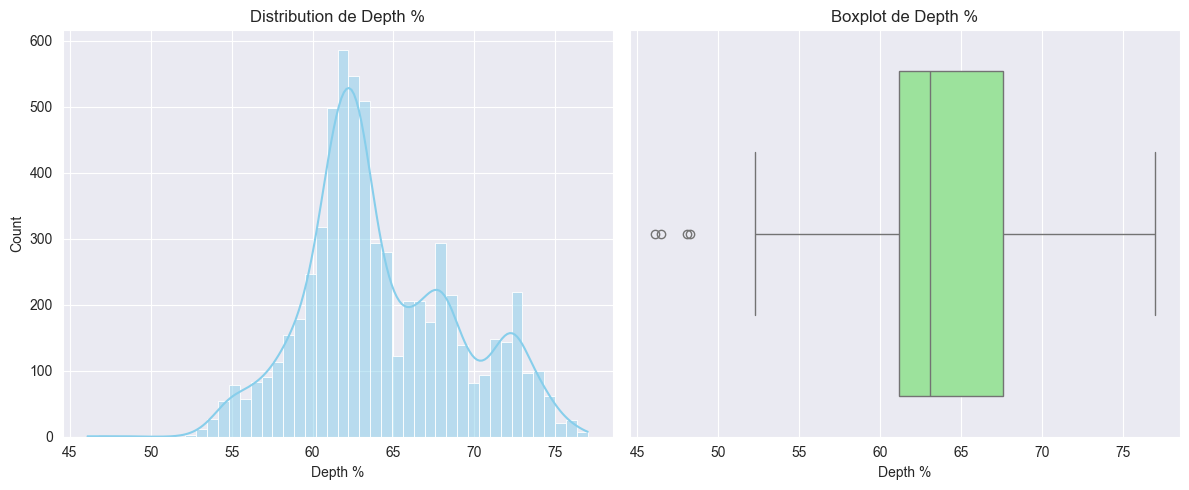

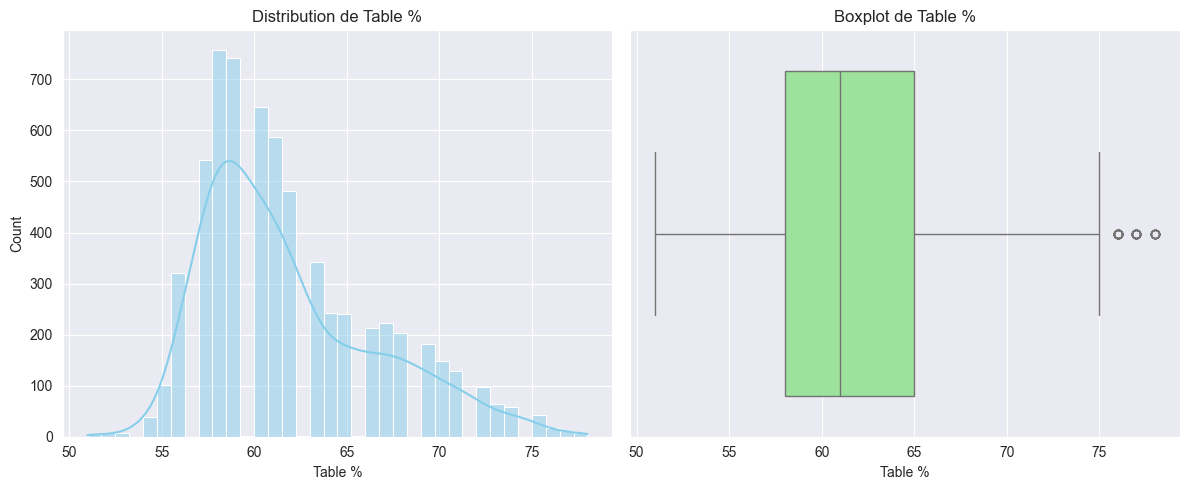

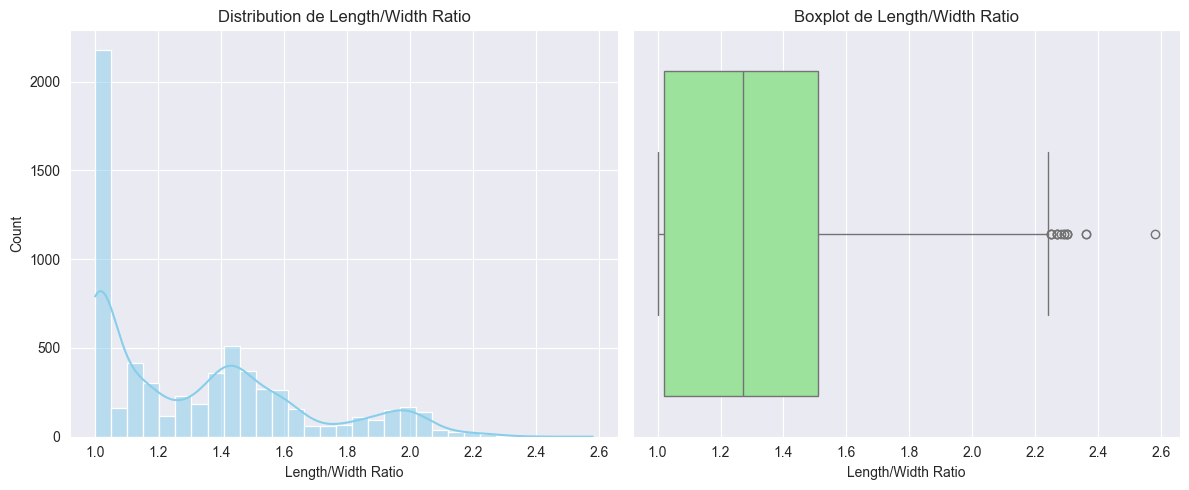

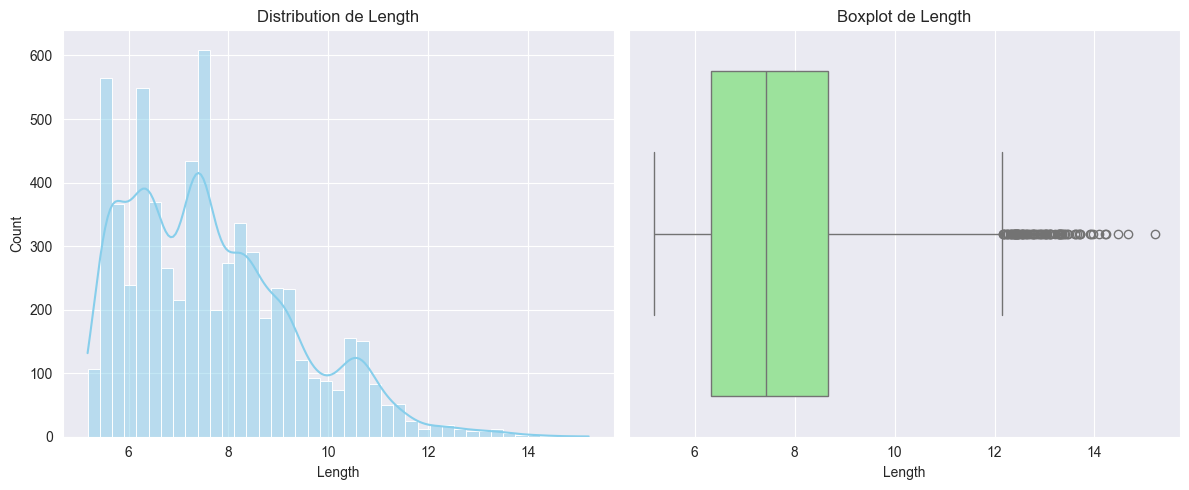

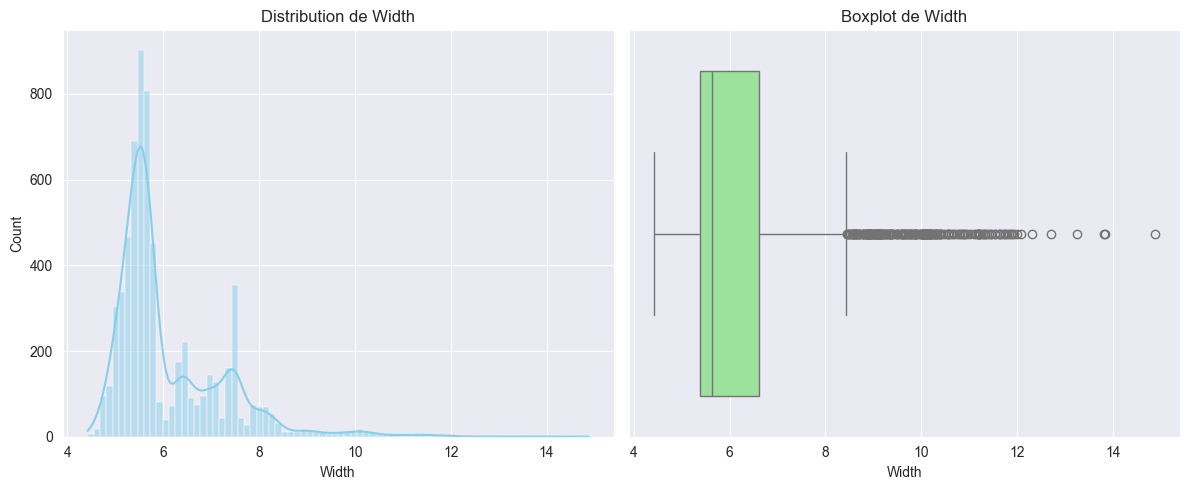

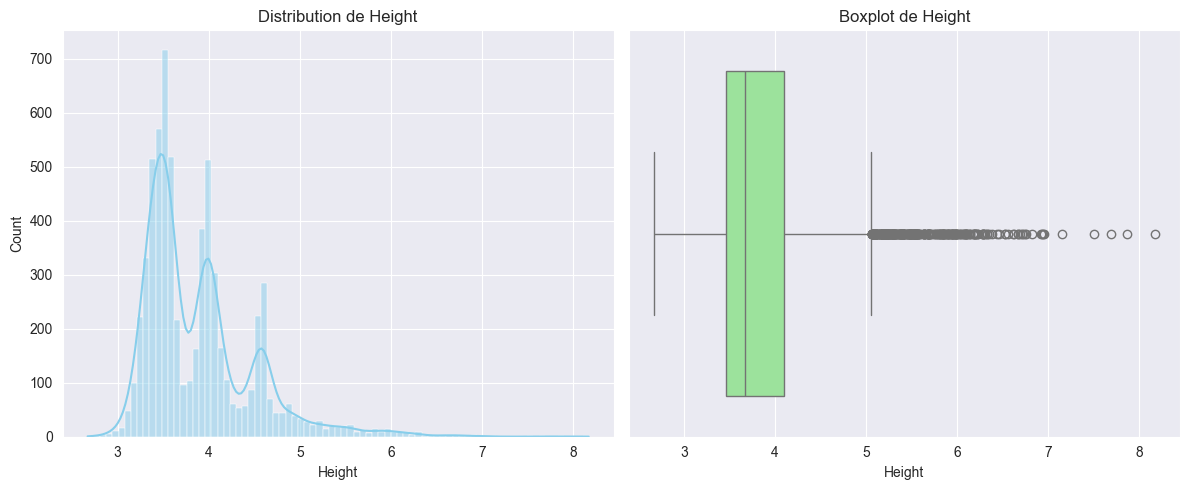

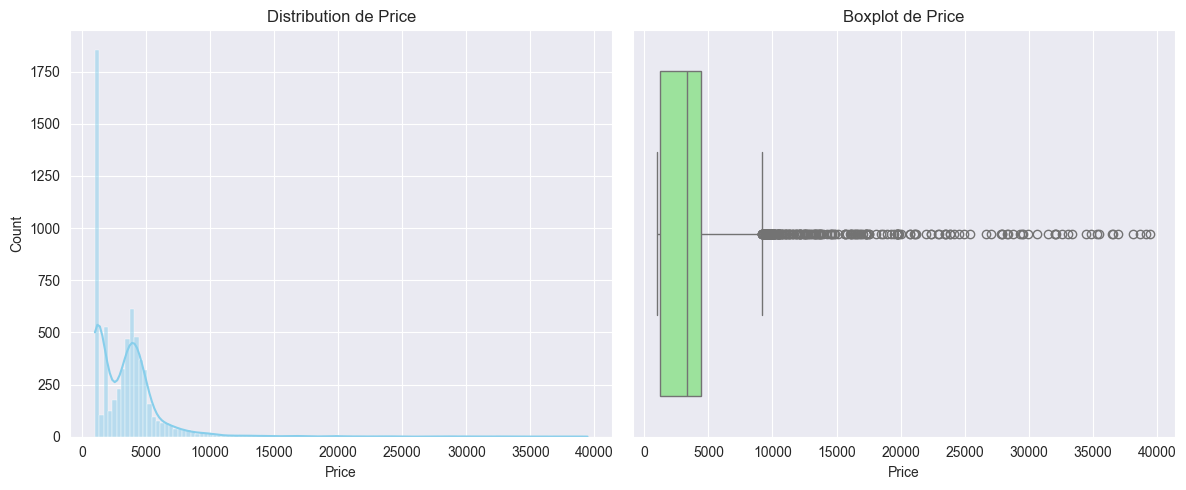

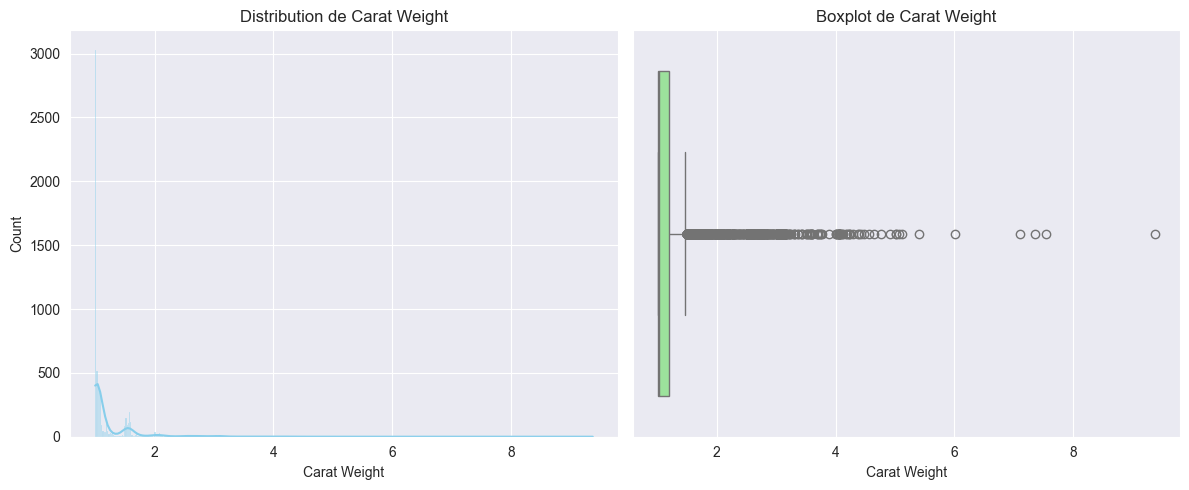

In [36]:
 for col in numeric_features + target_variable:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histogramme
    sns.histplot(data[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution de {col}')

    # Boxplot
    sns.boxplot(x=data[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot de {col}')

    plt.tight_layout()
    plt.show()

Diagramme pour les variable catégorielle


C:\Users\pasqu\AppData\Local\Temp\ipykernel_30020\925950267.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=order, palette='viridis')


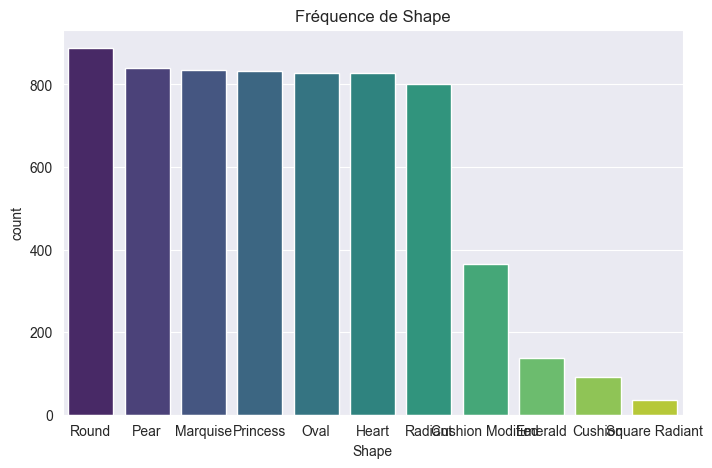

C:\Users\pasqu\AppData\Local\Temp\ipykernel_30020\925950267.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=order, palette='viridis')


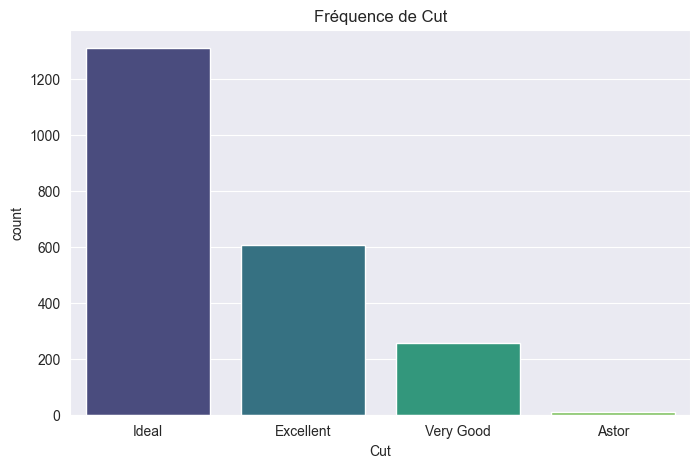

C:\Users\pasqu\AppData\Local\Temp\ipykernel_30020\925950267.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=order, palette='viridis')


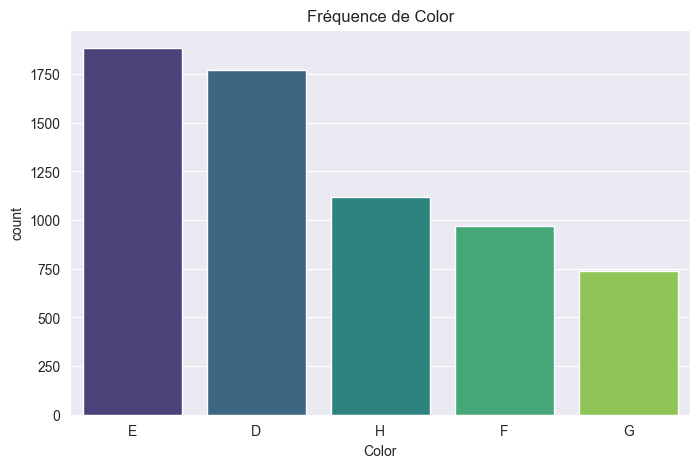

C:\Users\pasqu\AppData\Local\Temp\ipykernel_30020\925950267.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=order, palette='viridis')


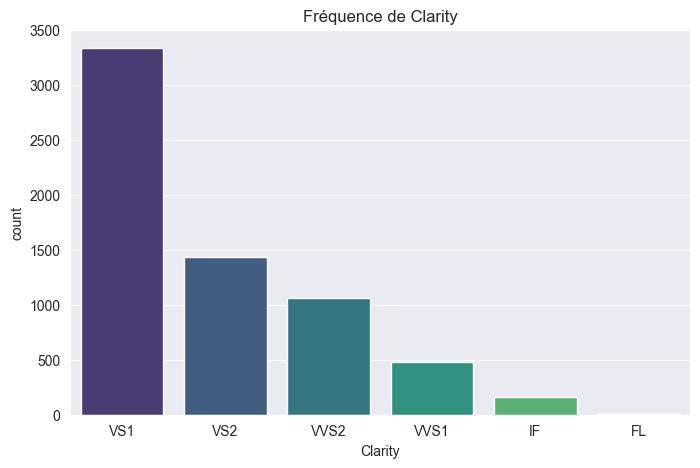

C:\Users\pasqu\AppData\Local\Temp\ipykernel_30020\925950267.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=order, palette='viridis')


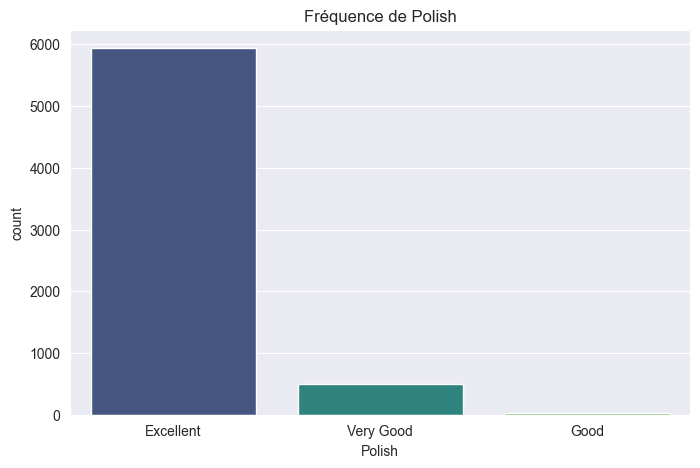

C:\Users\pasqu\AppData\Local\Temp\ipykernel_30020\925950267.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=order, palette='viridis')


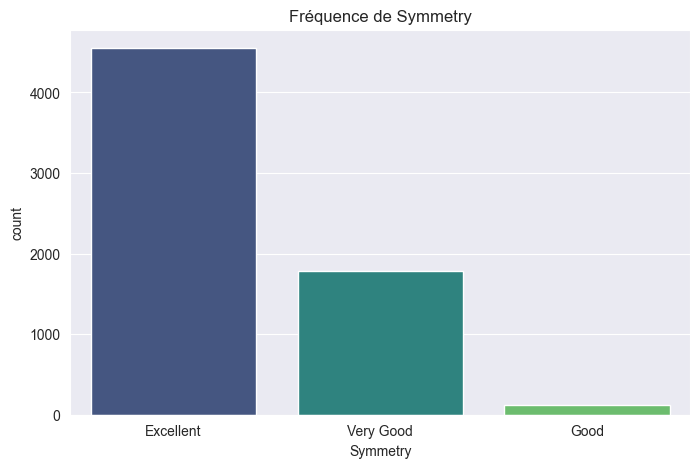

C:\Users\pasqu\AppData\Local\Temp\ipykernel_30020\925950267.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=order, palette='viridis')


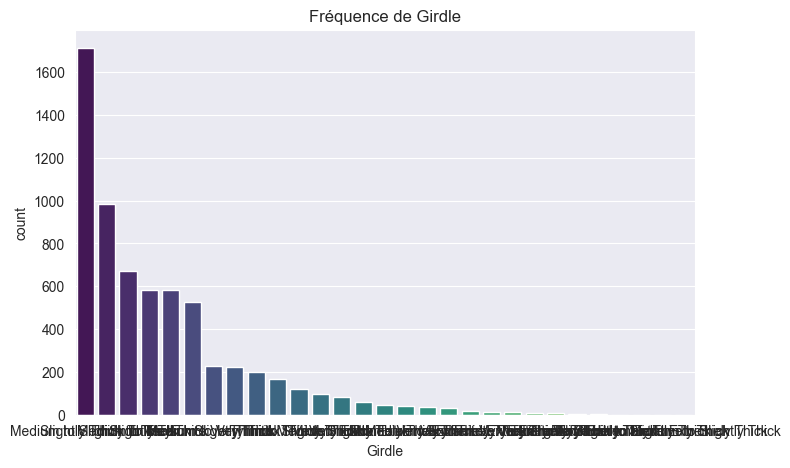

C:\Users\pasqu\AppData\Local\Temp\ipykernel_30020\925950267.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=order, palette='viridis')


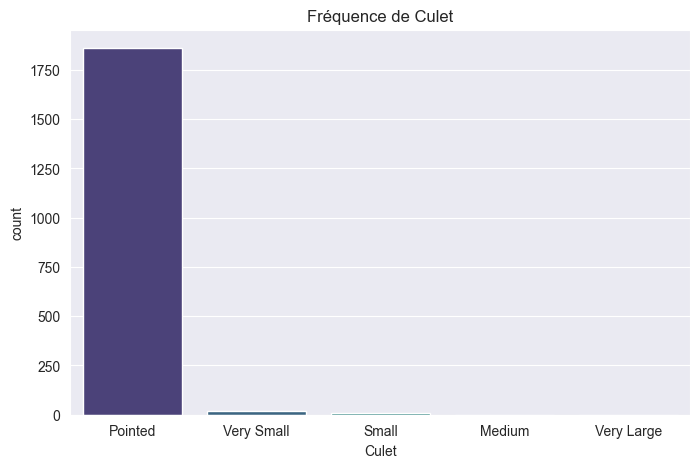

C:\Users\pasqu\AppData\Local\Temp\ipykernel_30020\925950267.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=order, palette='viridis')


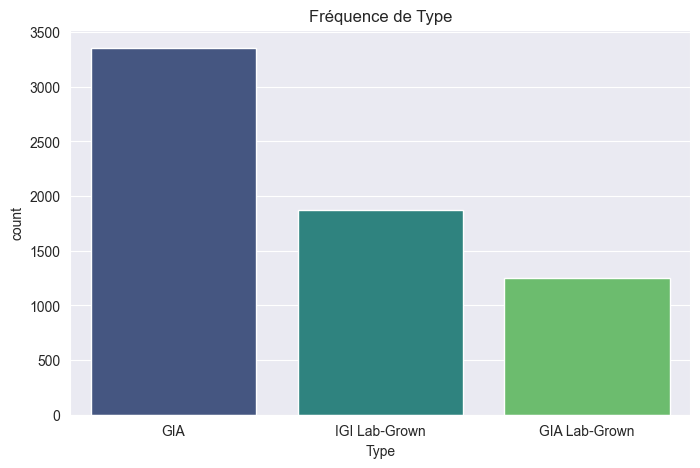

C:\Users\pasqu\AppData\Local\Temp\ipykernel_30020\925950267.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=order, palette='viridis')


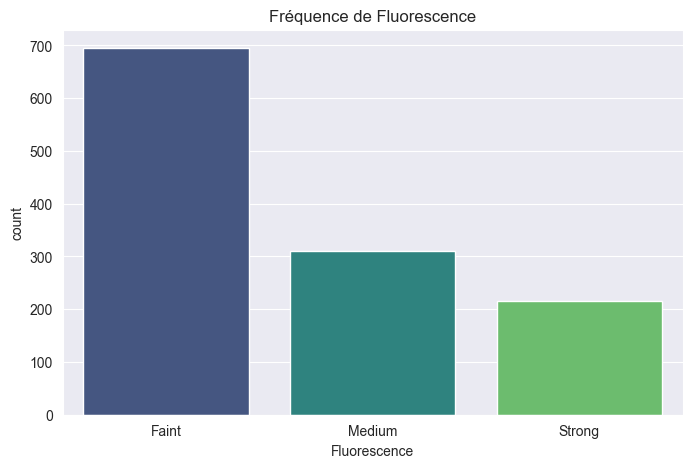

In [37]:
for col in categorical_features:
    plt.figure(figsize=(8, 5))
    order = data[col].value_counts().index
    sns.countplot(x=col, data=data, order=order, palette='viridis')
    plt.title(f'Fréquence de {col}')
    plt.show()

# 5) Analyse Bivariée


Boxplot des feature numérique comparée avec le prix


In [ ]:
for col in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y=target_variable[0], data=data, palette='coolwarm')
    plt.title(f'Distribution du {target_variable} par {col}')
    plt.show()

Boxplot des feature numérique comparée avec le nombre de carat


In [ ]:
for col in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y=target_variable[1], data=data, palette='coolwarm')
    plt.title(f'Distribution du {target_variable} par {col}')
    plt.show()

Boxplot des feature catégorielle comparée avec le prix


In [ ]:
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y=target_variable[0], data=data, palette='coolwarm')
    plt.title(f'Distribution du {target_variable} par {col}')
    plt.show()

Boxplot des feature catégorielle comparée avec le nombre de carat


In [ ]:
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y=target_variable[1], data=data, palette='coolwarm')
    plt.title(f'Distribution du {target_variable} par {col}')
    plt.show()

Matrice de corrélation

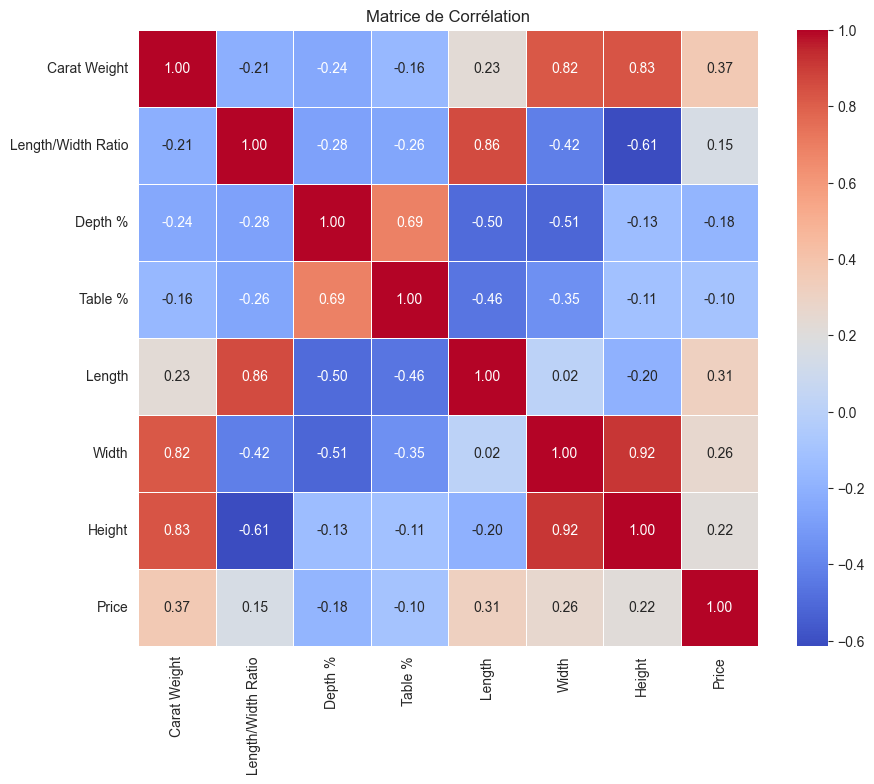

In [38]:
plt.figure(figsize=(10, 8))
numeric_df = data.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

Pair Plot

Génération du Pair Plot (échantillon de 1000 points)...


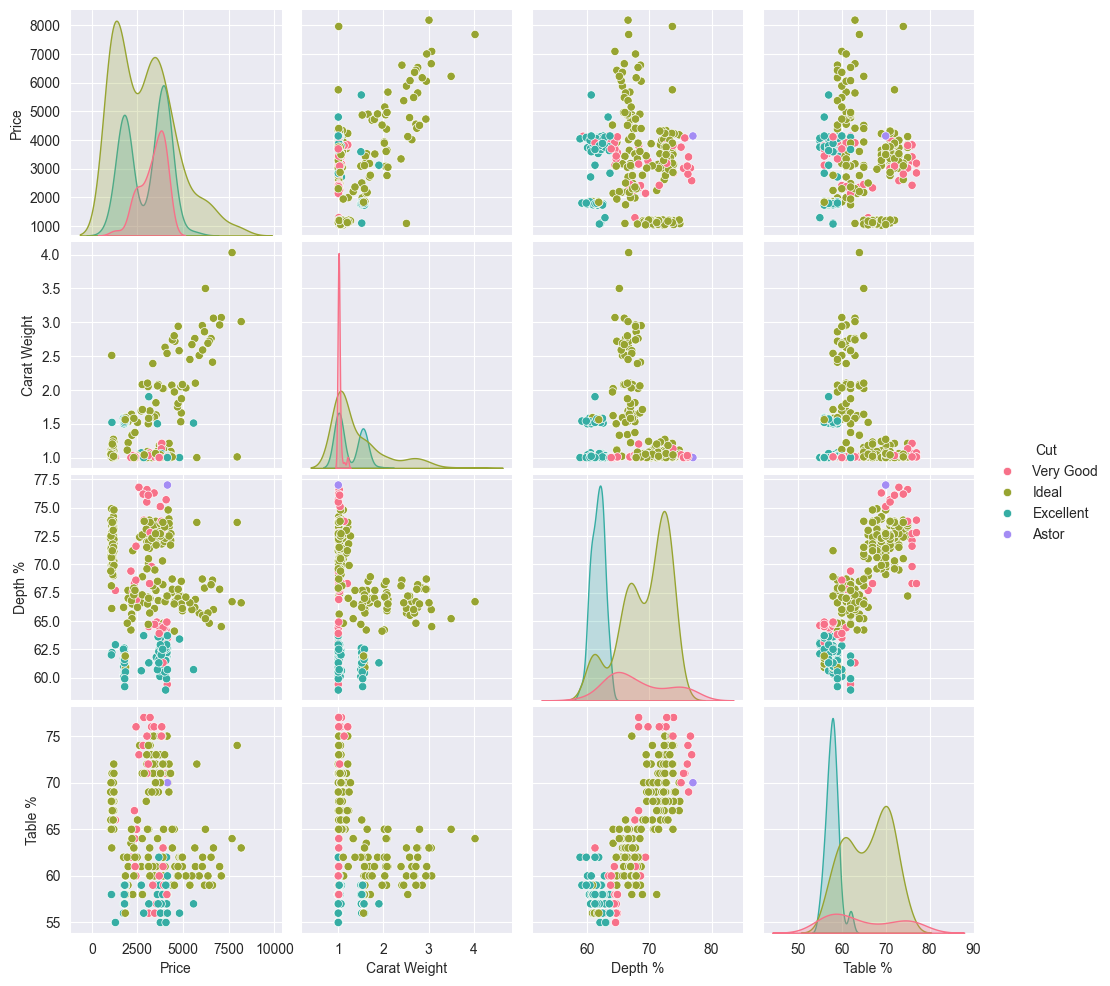

In [46]:
print("Génération du Pair Plot (échantillon de 1000 points)...")
sample_df = data.sample(1000, random_state=42)
sns.pairplot(sample_df[['Price', 'Carat Weight','Depth %', 'Table %', 'Cut']], hue='Cut', palette='husl')
plt.show()



